In [1]:
import numpy as np
import pandas as pd

import entsoapi
# from entsoe import EntsoeRawClient
from entsoe import EntsoePandasClient

import datetime
from datetime import datetime, timedelta

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('dark_background')

client = EntsoePandasClient(api_key=entsoapi.mykey)
print(datetime.today())

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

2021-03-10 10:47:52.689688


# HUPX Árak 2021

In [2]:
start = pd.Timestamp('202103010000', tz='Europe/Brussels')
end = pd.Timestamp('202103312345', tz='Europe/Brussels')
country_code = 'HU'
hupxActual = client.query_day_ahead_prices(country_code, start=start,end=end)

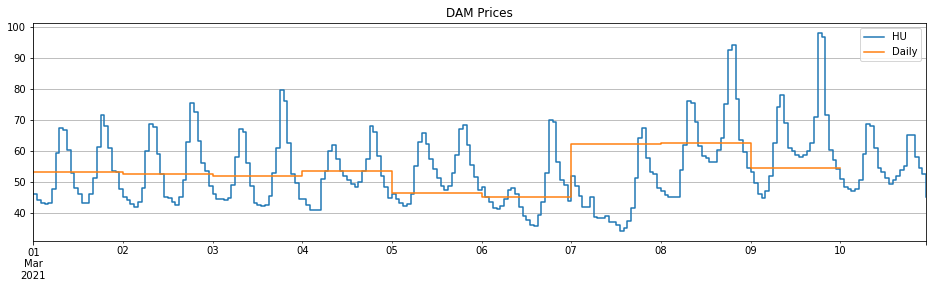

In [3]:
hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU')
x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(16,4), label='Daily')
plt.legend()
plt.grid(True)

In [4]:
hupxActual.resample('D').mean().round(2)

2021-03-01 00:00:00+01:00    52.74
2021-03-02 00:00:00+01:00    53.18
2021-03-03 00:00:00+01:00    52.60
2021-03-04 00:00:00+01:00    51.85
2021-03-05 00:00:00+01:00    53.34
2021-03-06 00:00:00+01:00    46.32
2021-03-07 00:00:00+01:00    45.04
2021-03-08 00:00:00+01:00    62.25
2021-03-09 00:00:00+01:00    62.60
2021-03-10 00:00:00+01:00    54.50
Freq: D, dtype: float64

# HUPX Árak 2020

In [6]:
start = pd.Timestamp('201601010000', tz='Europe/Brussels')
end = pd.Timestamp('201912312345', tz='Europe/Brussels')
country_code = 'HU'
hupx = client.query_day_ahead_prices(country_code, start=start,end=end)

In [7]:
print(hupx.describe().round(2))
print('Max HUPX DA ár: \t{}, {} EUR/MWh'.format(hupx.idxmax(), hupx.max()))
print('Min HUPX DA ár: \t{}, {} EUR/MWh'.format(hupx.idxmin(), hupx.min()))

count    35064.00
mean        46.78
std         20.25
min        -25.97
25%         33.32
50%         43.99
75%         57.82
max        300.10
dtype: float64
Max HUPX DA ár: 	2017-01-11 17:00:00+01:00, 300.1 EUR/MWh
Min HUPX DA ár: 	2018-01-01 05:00:00+01:00, -25.97 EUR/MWh


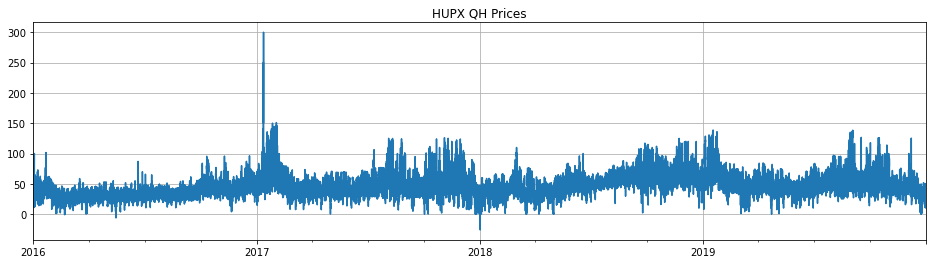

In [8]:
# Na lássuk a HUPX görbét
x = hupx.plot(title='HUPX QH Prices',grid=True, figsize=(16,4), drawstyle='steps-post')

In [ ]:
# Zsinórosítás: 24 óra átlaga azaz napi ár meghatározása
x = hupx.resample('W').mean()\
.plot(title='HUPX DA Zsinór',grid=True, figsize=(16,4), drawstyle='steps-post')

# Terhelési görbe

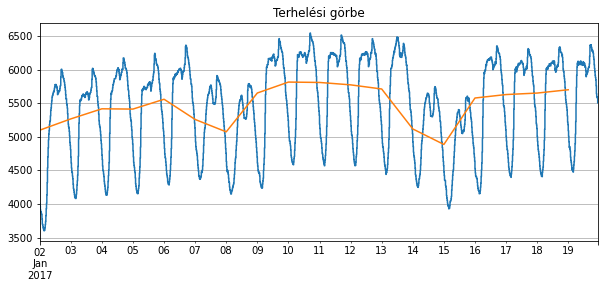

In [10]:
# gördülő 2 hét vissza
start = pd.Timestamp('201701020000', tz='Europe/Brussels')
end = pd.Timestamp('201701192345', tz='Europe/Brussels')

country_code = 'HU'
# x=client.query_load(country_code, start=start,end=end)

c= x.plot(title='Terhelési görbe', grid=True, figsize=(10,4), drawstyle='steps-post')
c= x.resample('D').mean().plot(title='Terhelési görbe', grid=True, figsize=(10,4))

201803060000


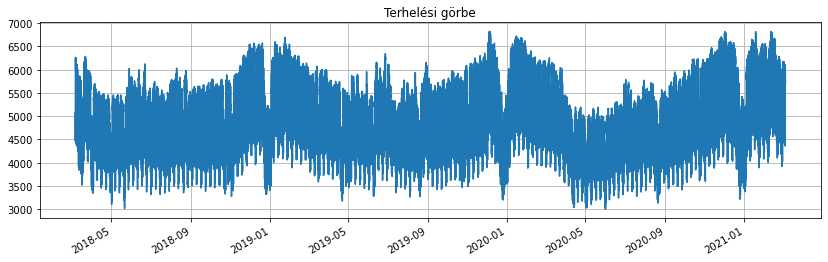

In [3]:
# gördülő 2 hét vissza
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=365*6)
fromdate = fromdate.strftime('%Y%m%d0000')
print(fromdate)

start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'
x=client.query_load(country_code, start=start,end=end)

c= x.plot(title='Terhelési görbe', grid=True, figsize=(14,4), drawstyle='steps-post')

In [ ]:
start1 = pd.Timestamp('202001010000', tz='Europe/Brussels')
end1 = pd.Timestamp('202012312345', tz='Europe/Brussels')

start2 = pd.Timestamp('201901010000', tz='Europe/Brussels')
end2 = pd.Timestamp('201912312345', tz='Europe/Brussels')
country_code = 'HU' 

# Terhelési adatok lekérdezése
load_2020=client.query_load(country_code, start=start1,end=end1)
load_2019=client.query_load(country_code, start=start2,end=end2)

hupx_2020 = client.query_day_ahead_prices(country_code, start=start1,end=end1)
hupx_2019 = client.query_day_ahead_prices(country_code, start=start2,end=end2)

In [ ]:
hupx_202010 = client.query_day_ahead_prices(country_code, start=start1,end=end1)
hupx_201910 = client.query_day_ahead_prices(country_code, start=start2,end=end2)

In [ ]:
hupx_2020.plot(title='Terhelési görbe', grid=True, figsize=(14,4))
hupx_2019.shift(366, freq='D').plot(title='Terhelési görbe 2020/2019', grid=True, figsize=(14,4))

In [ ]:
years = pd.DataFrame()
years['2019'] = hupx_2019.describe()
years['2020'] = hupx_2020.describe()
years['2019_load'] = load_2019.describe()
years['2020_load'] = load_2020.describe()
years.round(2)

In [ ]:
def showDetails(load, year):
    print('Max Load: \t{}, {} MW'.format(load.idxmax(), load.max()))
    print('Min Load: \t{}, {} MW'.format(load.idxmin(), load.min()))
    peak = load.between_time('08:00', '20:00')
    print('Max Peak Load: \t{}, {} MW'.format(peak.idxmax(), peak.max()))
    print('Min Peak Load: \t{}, {} MW'.format(peak.idxmin(), peak.min()))
    load.plot(title='Terhelési görbe '+year, grid=True, figsize=(14,4))
    plt.show()

showDetails(load_2019, '2019')
showDetails(load_2020, '2020')

## Tartamgörbe előállítása (2020 vs 2019)

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_axes([0.1, 0.1, 0.6, 0.75])

plt.subplot(2,1,1)
plt.plot(load_2020)
plt.ylabel('Rendszerterhelés [MW]')
plt.grid(True)
plt.title('Terhelési görbe 2020')

plt.subplot(2,1,2)
plt.plot(load_2020.sort_values(ascending=False).to_list(), label='2020')
plt.plot(load_2019.sort_values(ascending=False).to_list(), label='2019')
plt.ylabel('[MW]')
plt.title('Tartamdiagramm')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# Szezonalitás

In [ ]:
load_2020=load_2020.tz_localize(None)
load_2019=load_2019.tz_localize(None)
load_2020.resample('W').max().plot(figsize=(12,4), label='2020',drawstyle='steps-post')
# 2019-et eltolom 365 nappal jobbra
load_2019.tshift(365, freq='D').resample('W').max()\
.plot(figsize=(12,4), label='2019', drawstyle='steps-post')
plt.title('Heti maximális(!) bruttó rendszerterhelés')
x = plt.legend()

In [ ]:
start = pd.Timestamp('202010250000', tz='Europe/Brussels')
end = pd.Timestamp('202010260000', tz='Europe/Brussels')
country_code = 'HU' 
g = client.query_generation('HU', start=start,end=end, psr_type=None)

In [ ]:
g.iloc[0]

In [ ]:
g.columns

In [ ]:
igc = client.query_installed_generation_capacity('HU', start=start,end=end, psr_type=None)
igc.columns

In [ ]:
igc.T

## Napi terheléslefutások

In [5]:
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=2)
fromdate = fromdate.strftime('%Y%m%d0000')
start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'
dfLoad =client.query_load(country_code, start=start,end=end)
dfGeneration=client.query_generation(country_code, start=start,end=end, psr_type=None)

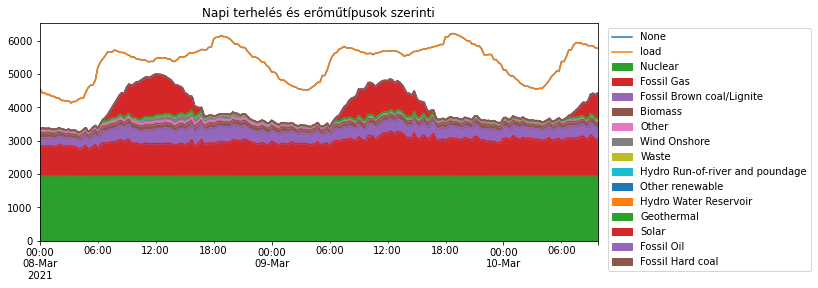

In [6]:
dfLoad.plot()
columns = dfGeneration.iloc[100].sort_values(ascending=False).index
ax= dfLoad.plot(label='load')
ax = dfGeneration[columns].abs().plot.area(stacked=True, figsize=(10,4), ax=ax)
plt.legend(bbox_to_anchor=(1.01,1), loc="upper left")
ax=plt.title('Napi terhelés és erőműtípusok szerinti')
# hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU', secondary_y=True)
# x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(10,4), label='Daily', secondary_y=True)
# plt.legend()
# plt.grid(True)

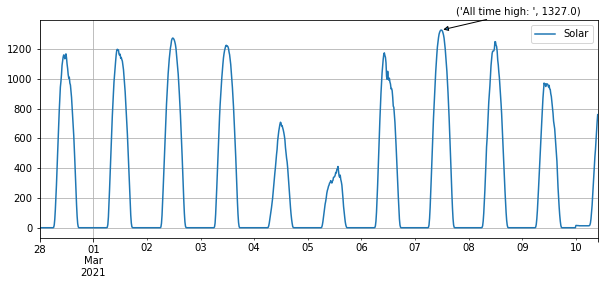

In [7]:
today= datetime.today().strftime('%Y%m%d%H%M')
fromdate= datetime.today() - timedelta(days=10)
fromdate = fromdate.strftime('%Y%m%d0000')
start = pd.Timestamp(fromdate, tz='Europe/Brussels')
end = pd.Timestamp(today, tz='Europe/Brussels')
country_code = 'HU'

# dfLoad =client.query_load(country_code, start=start,end=end)
dfSolar=client.query_generation(country_code, start=start,end=end, psr_type='B16',  )
ax= dfSolar.plot(figsize=(10,4), grid=True)
text = 'All time high: ',dfSolar.max()[0]
x=ax.annotate(text, xy=(dfSolar.idxmax()[0],dfSolar.max()), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

In [8]:
dfSolar.idxmax()[0]

Timestamp('2021-03-07 11:45:00+0100', tz='Europe/Budapest')

In [9]:
print('Max Solar: \t{}, {} MW'.format(dfSolar.idxmax(), dfSolar.max()))

Max Solar: 	Solar   2021-03-07 11:45:00+01:00
dtype: datetime64[ns, Europe/Budapest], Solar    1327.0
dtype: float64 MW


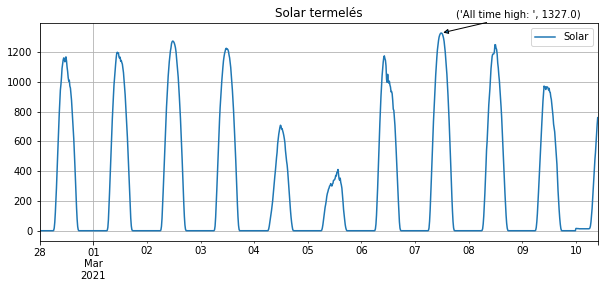

In [10]:
ax=dfSolar.plot(title='Solar termelés',figsize=(10,4), grid=True)
text = 'All time high: ',dfSolar.max()[0]
x=ax.annotate(text, xy=(dfSolar.idxmax()[0],dfSolar.max()), xytext=(15, 15), textcoords='offset points', arrowprops=dict(arrowstyle='-|>'))

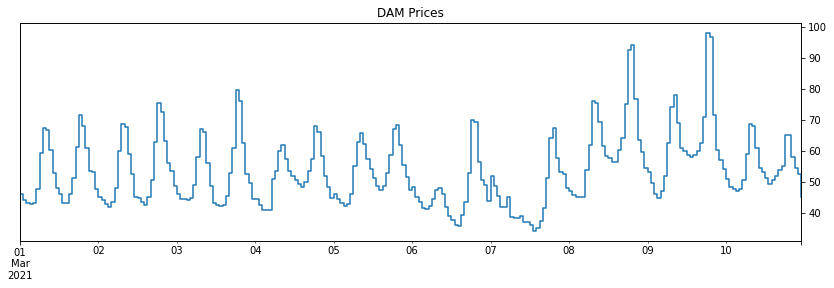

In [11]:
ax = hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HUPX DAM', secondary_y=True, grid=True, figsize=(14,4))

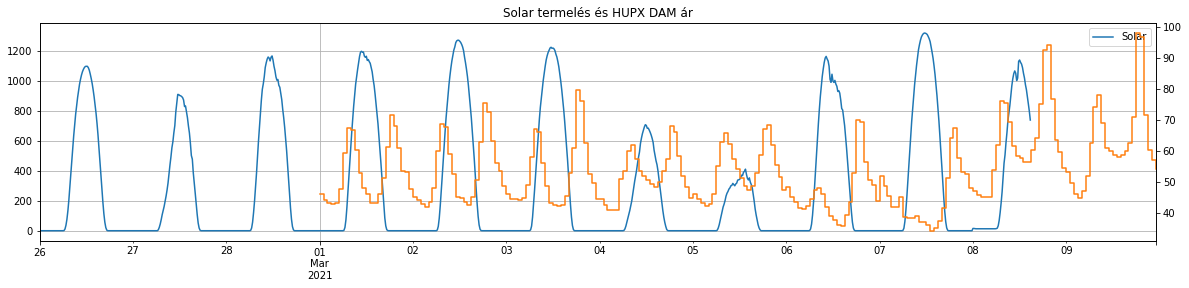

In [13]:
ax = dfSolar.plot(figsize=(10,4))
ax = hupxActual.plot(title='Solar termelés és HUPX DAM ár', drawstyle='steps-post', secondary_y=True, figsize=(20,4), grid=True, )

In [ ]:
hupxActual.plot(title='DAM Prices', drawstyle='steps-post', label='HU')
x =hupxActual.resample('D').mean().plot(drawstyle='steps-pre',grid=True, figsize=(10,4), label='Daily')
plt.legend()
plt.grid(True)

In [ ]:
dfgp=dfGeneration.plot(subplots=True, layout=(4,4), figsize=(12,12), sharex=True)
plt.tight_layout()

In [ ]:
#KSH adatok
import pandas as pd

link ='http://www.ksh.hu/docs/hun/xstadat/xstadat_eves/xls/3_8_2i.xls'
kshData = pd.read_excel(link, skiprows=1 )
kshData.plot()

In [ ]:
kshData.rename({'Erőművi önfogyasztás, hálózati és transzformátor-veszteség ': 'Önfogyasztás'})

In [ ]:
kshData.columns

In [ ]:
link ='http://www.ksh.hu/docs/hun/xstadat/xstadat_eves/xls/3_8_2i.xls'
kshData = pd.read_excel(link, skiprows=1 )
kshData.head(3)

In [ ]:
kshData['Netto Termelés'] = kshData.Termelés - kshData['Erőművi önfogyasztás, hálózati és transzformátor-veszteség ']
kshData['Import Szaldó'] = kshData.Behozatal - kshData.Kivitel
kshData['Netto Import'] = kshData['Import Szaldó'] / kshData['Netto Termelés']
kshData['Netto Import2'] = kshData['Import Szaldó'] / kshData['Netto Termelés']
kshData.plot(x='Év', y=['Netto Termelés', 'Behozatal'], figsize=(14,4), grid=True, kind='bar')
kshData.plot(x='Év', y=['Netto Import'], figsize=(14,4), grid=True)

## Magyarország bruttó rendszerterhelése és fogyasztása 2020 szeptember
Összehasonlításként a http://www.mekh.hu/download/4/e2/e0000/havi_piacmonitoring_riport_villamos_energia_2020_szeptember.pdf
04. ábárval

In [ ]:
start = pd.Timestamp('202009010000', tz='Europe/Brussels')
end = pd.Timestamp('202009302345', tz='Europe/Brussels')
country_code = 'HU'
load =client.query_load(country_code, start=start,end=end)
# gen=client.query_generation(country_code, start=start,end=end, psr_type=None)

In [ ]:
y = load.resample('D').mean().plot(kind='bar', figsize=(14,5), grid=True)
# y = load.resample('D').max().plot(kind='line', figsize=(14,5), grid=True)
y.set_ylim(4000,6400)

In [ ]:
load

## Heti terhelési görbe (KW47: 2020.11.16-22)

In [ ]:
start = pd.Timestamp('202011160000', tz='Europe/Brussels')
end = pd.Timestamp('202011230000', tz='Europe/Brussels')
country_code = 'HU'
hetiload =client.query_load(country_code, start=start,end=end)

In [ ]:
hetiload.plot(title='Heti Terhelési görbe \n KW47: 2020.11.16-22', grid=True, figsize=(14,4), drawstyle='steps-post')

In [ ]:
start = pd.Timestamp('201802210000', tz='Europe/Brussels')
end = pd.Timestamp('201802280000', tz='Europe/Brussels')
country_code = 'HU'
hetiload =client.query_load(country_code, start=start,end=end)
hetiload.plot(title='Heti Terhelési görbe \n 2018.feb.21-27', grid=True, figsize=(10,5), drawstyle='steps-post')

## Szezonalitás

In [ ]:
start = pd.Timestamp('201701010000', tz='Europe/Brussels')
end = pd.Timestamp('202012310000', tz='Europe/Brussels')
country_code = 'HU'
lt =client.query_load(country_code, start=start,end=end)
len(lt)

In [ ]:
lt.head()

In [ ]:
dflt = pd.DataFrame(lt)

In [ ]:
dflt

In [ ]:
dflt.index = dflt.index.tz_localize(None)

In [ ]:
dflt.resample('W').mean().plot()

In [ ]:
df_weekly = dflt.resample('W').mean()
x = df_weekly[df_weekly.index.year== 2017].plot()
df_weekly[df_weekly.index.year== 2018].plot(ax=x)
df_weekly[df_weekly.index.year== 2019].plot(ax=x)
df_weekly[df_weekly.index.year== 2020].plot(ax=x)

In [ ]:
pv = df_weekly.pivot_table(df_weekly, index=df_weekly.index.isocalendar().week, columns=df_weekly.index.year)
pv.plot(Title='Szezonálus fogyasztás hetente', figsize=(14,4), grid=True)

In [ ]:
df_weekly.pivot_table(df_weekly, index=df_weekly.index.month, columns=df_weekly.index.year)

## Az elérhető összes funckió tesztelése

In [2]:
start = pd.Timestamp('202103010000', tz='Europe/Brussels')
end = pd.Timestamp('202103312345', tz='Europe/Brussels')
country_code = 'HU'

<AxesSubplot:>

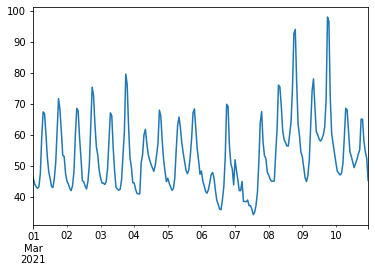

In [3]:
df = client.query_day_ahead_prices(country_code, start=start,end=end)
df.plot()

<AxesSubplot:>

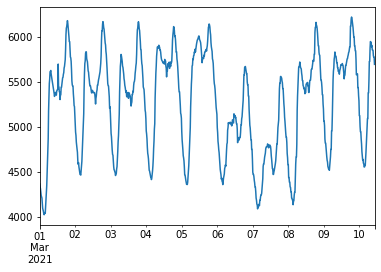

In [4]:
df = client.query_load(country_code, start=start,end=end)
df.plot()

<AxesSubplot:>

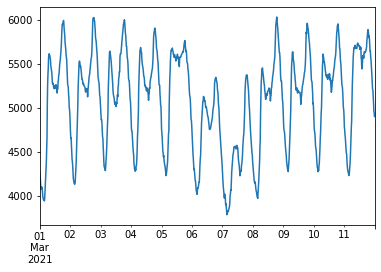

In [5]:
df = client.query_load_forecast(country_code, start=start,end=end)
df.plot()

<AxesSubplot:>

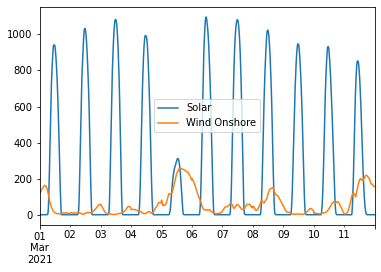

In [6]:
df = client.query_wind_and_solar_forecast(country_code, start=start,end=end, psr_type=None)
df.plot()

<AxesSubplot:>

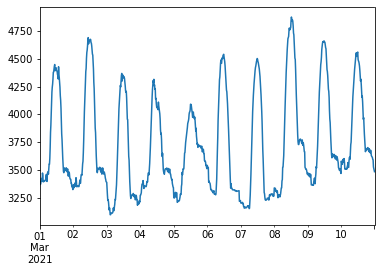

In [7]:
df = client.query_generation_forecast(country_code, start=start,end=end)
df.plot()

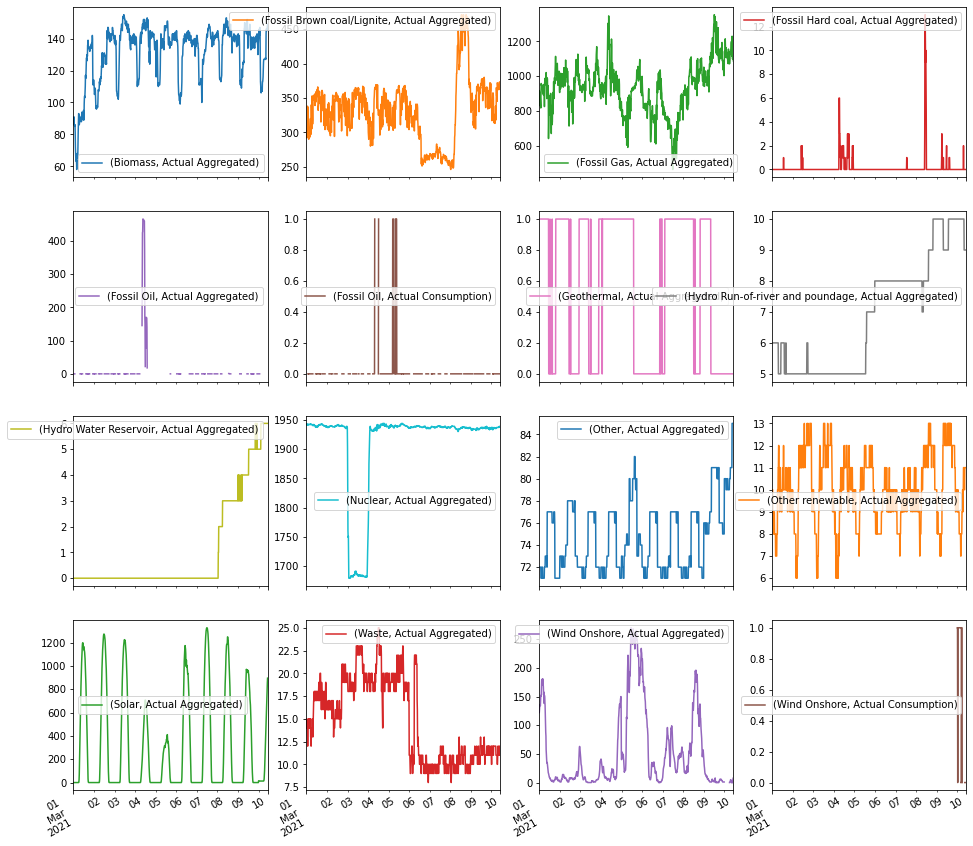

In [31]:
df = client.query_generation(country_code, start=start,end=end, psr_type=None)
ax= df.plot(subplots=True, layout=(4,4), sharex=True, sharey=False, figsize=(16,16))

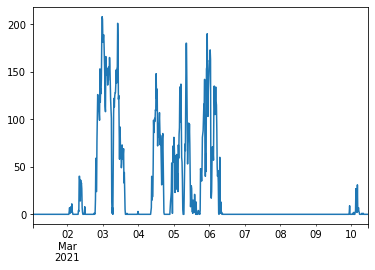

In [21]:
country_code_from="RO"
country_code_to="HU"
df = client.query_crossborder_flows(country_code_from,country_code_to,  start=start, end=end)
x=df.plot()

<AxesSubplot:>

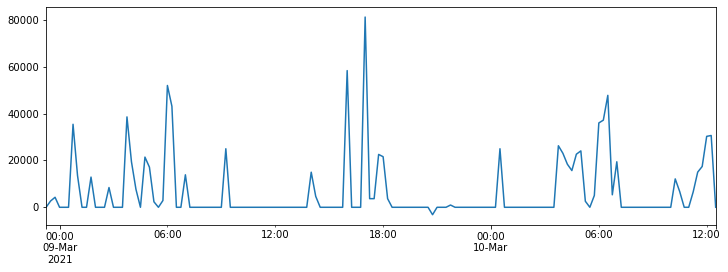

In [35]:
df= client.query_imbalance_prices(country_code, start=start, end=end, psr_type=None)
# df['short'] = df.Short *-1
df.Long.tail(150).plot(figsize=(12,4))

<AxesSubplot:>

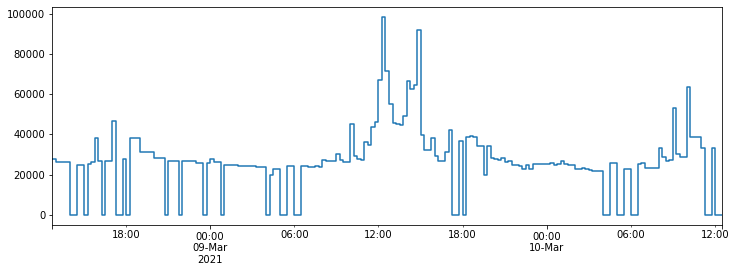

In [40]:
df.Short.tail(2*96).plot(figsize=(12,4), drawstyle='steps-post')

In [33]:
!pip show entsoe-py

Name: entsoe-py
Version: 0.3.2
Summary: A python API wrapper for ENTSO-E
Home-page: https://github.com/EnergieID/entsoe-py
Author: EnergieID.be
Author-email: jan@energieid.be
License: MIT
Location: c:\users\janos\anaconda3\lib\site-packages
Requires: requests, pytz, pandas, beautifulsoup4
Required-by: 


Text(0, 0.5, '($W/{m^2}/\\mu m$)')

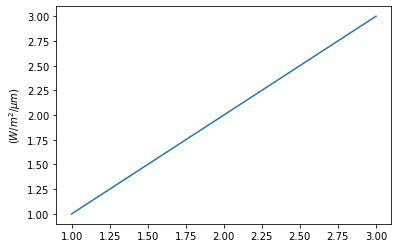

In [41]:
from matplotlib.pyplot import *
plot([1, 2, 3], [1, 2, 3])
ylabel("($W/{m^2}/\mu m$)")